In [ ]:
# !git clone https://github.com/UCSD-AI4H/COVID-CT
# !cd COVID-CT/Images-processed/ && unzip CT_COVID.zip 
# !cd COVID-CT/Images-processed/ && unzip CT_NonCOVID.zip 

In [ ]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
images = glob('COVID-CT/Images-processed/*/*.png')
print(len(images))
print(images[:2])

544
['COVID-CT/Images-processed/CT_NonCOVID/1562.png', 'COVID-CT/Images-processed/CT_NonCOVID/587.png']


In [ ]:
image = cv2.imread(images[0])[:, :, 0]

(401, 512)


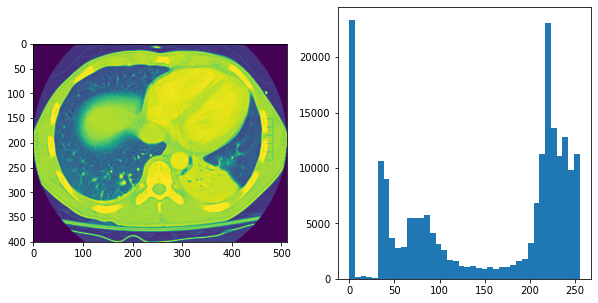

In [ ]:
print(image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.hist(image.flatten(), bins=40)
plt.show()

In [ ]:
mask = ((image > 50) & (image < 200)).astype('uint8')

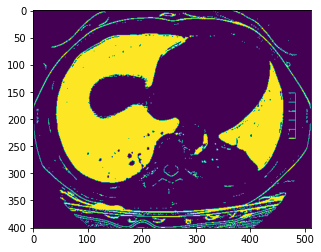

In [ ]:
plt.imshow(mask)
plt.show()

In [ ]:
kernel_size = 5
iterations = 1

kernel = np.ones((kernel_size, kernel_size), np.uint8)
erosion = cv2.erode(mask, kernel, iterations=iterations)

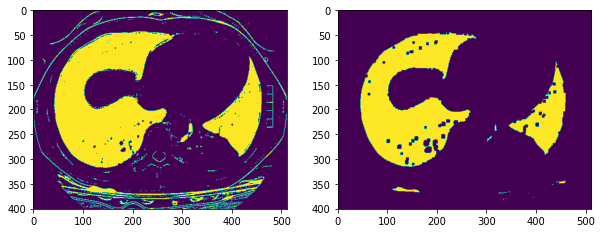

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(mask)
plt.subplot(122)
plt.imshow(erosion)
plt.show()

In [ ]:
dilation = cv2.dilate(erosion, kernel, iterations=iterations)

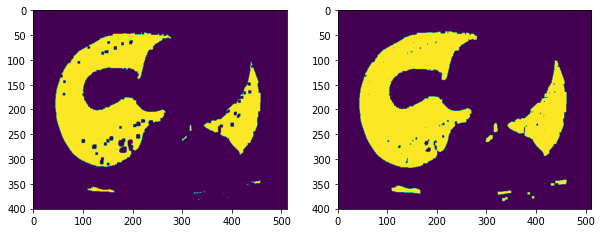

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(erosion)
plt.subplot(122)
plt.imshow(dilation)
plt.show()

In [ ]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=iterations)

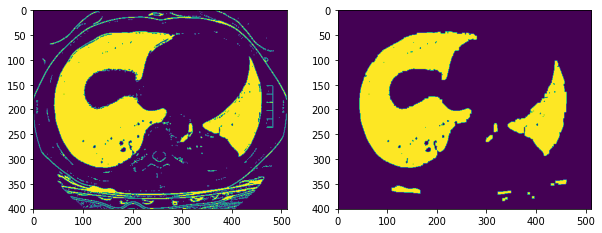

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(mask)
plt.subplot(122)
plt.imshow(opening)
plt.show()

In [ ]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

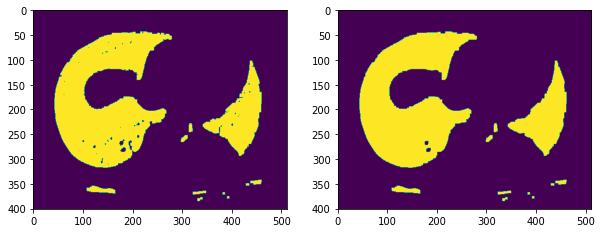

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(opening)
plt.subplot(122)
plt.imshow(closing)
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(len(contours))

for contour in contours:
  print(cv2.contourArea(contour))

13
43.5
16.0
16.0
112.5
496.0
24.0
142.0
108.5
102.0
9025.5
35623.0
75.5
64.5


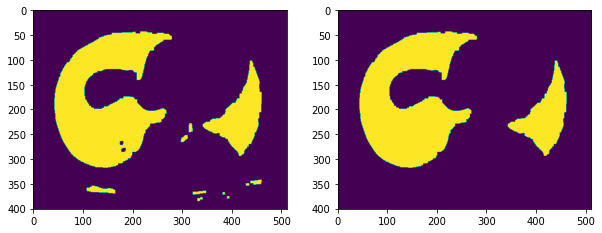

In [ ]:
contours_mask = np.zeros(mask.shape, dtype='uint8')
cv2.drawContours(contours_mask, [contour for contour in contours if cv2.contourArea(contour)> 500], -1, color=1, thickness=cv2.FILLED)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(closing)
plt.subplot(122)
plt.imshow(contours_mask)
plt.show()

In [ ]:
def lung_mask(image, threshold_min=50, threshold_max=200, kernel_size=5, iterations=1, area_threshold=500):
  mask = ((image > threshold_min) & (image < threshold_max)).astype('uint8')
  kernel = np.ones((kernel_size, kernel_size), np.uint8)
  opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=iterations)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

  contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours_mask = np.zeros(mask.shape, dtype='uint8')
  cv2.drawContours(contours_mask, [contour for contour in contours if cv2.contourArea(contour)> area_threshold], -1, color=1, thickness=cv2.FILLED)
  return contours_mask

In [ ]:
mask = lung_mask(image)

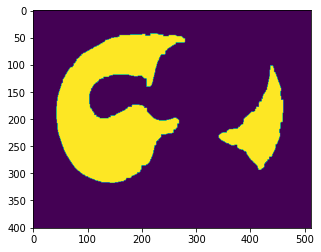

In [ ]:
plt.imshow(mask)

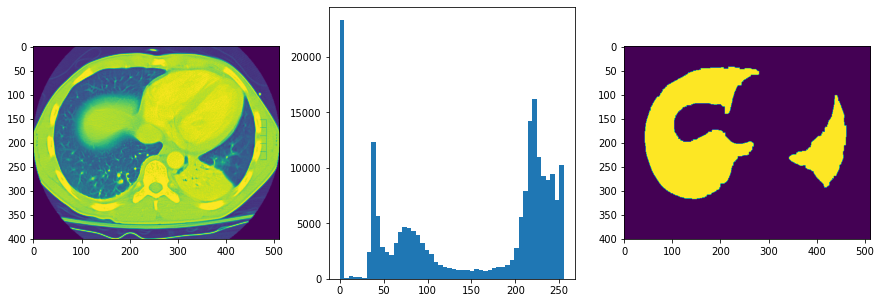

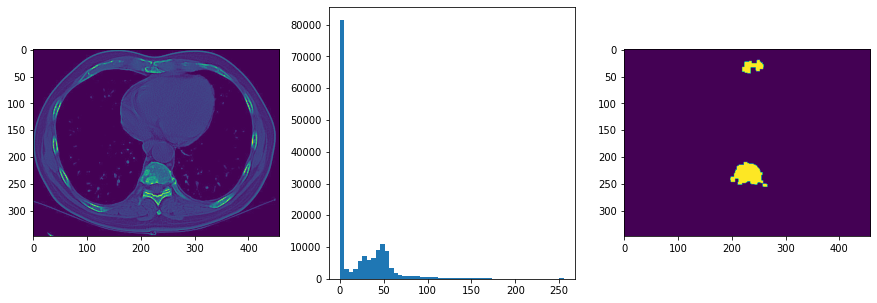

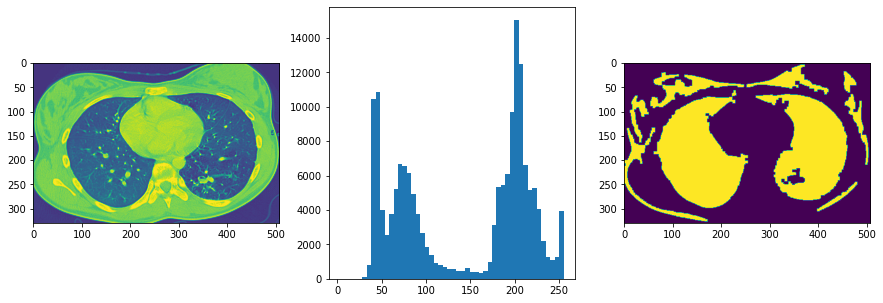

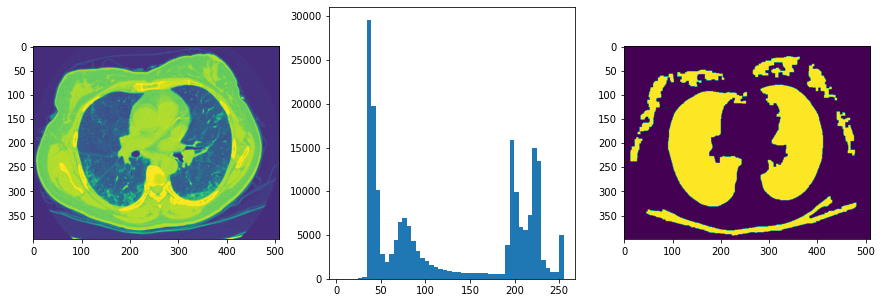

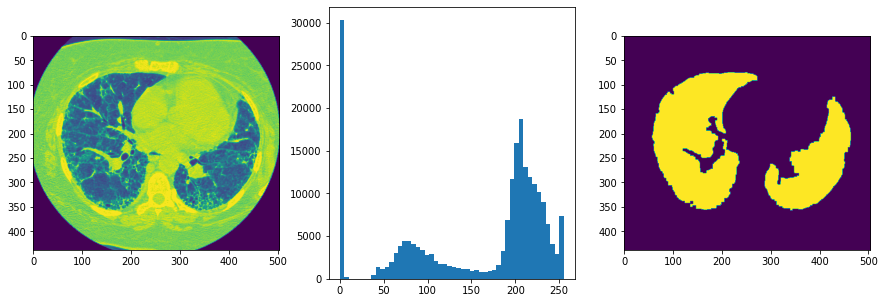

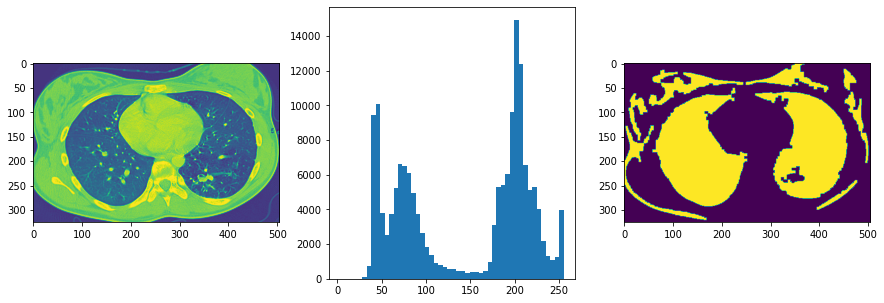

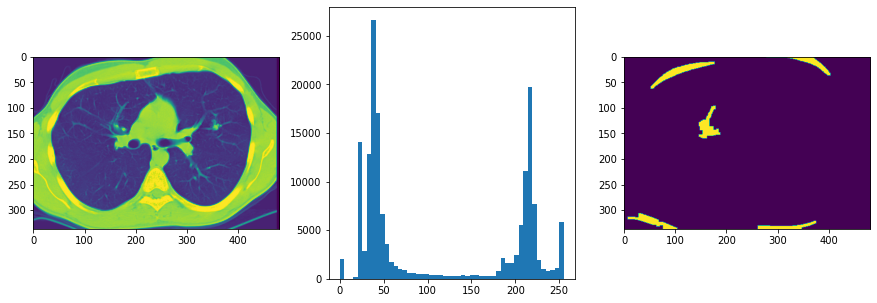

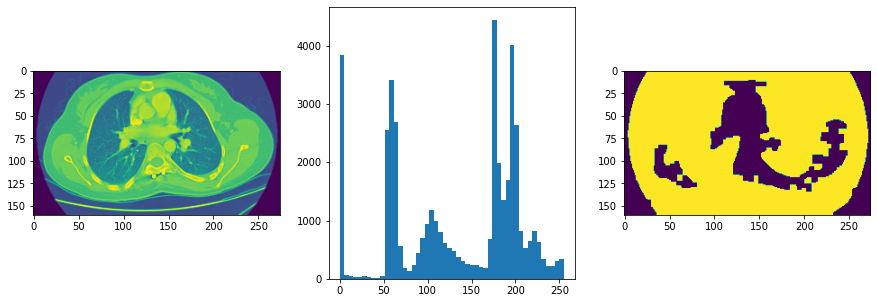

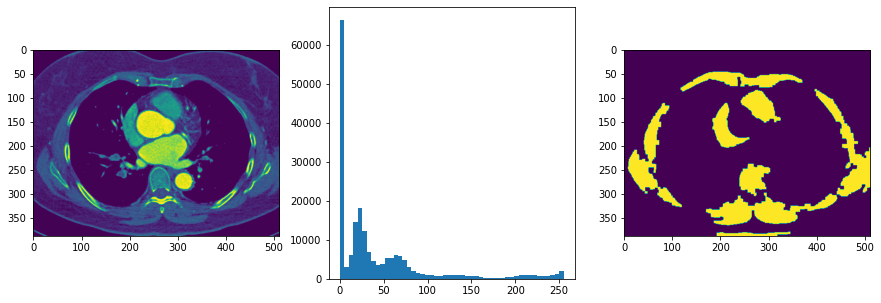

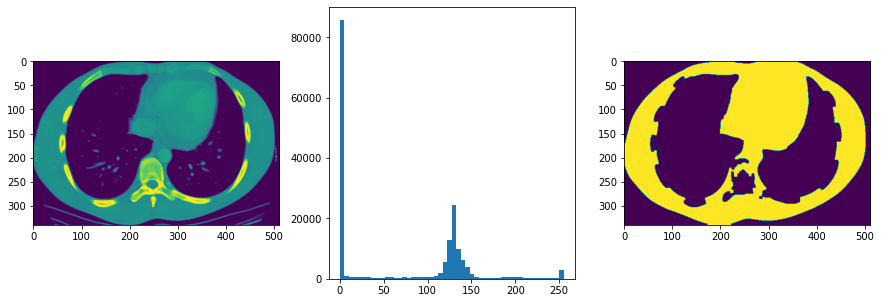

In [ ]:
for i in range(10):
  image = image = cv2.imread(images[i])[:, :, 0]
  mask = lung_mask(image)

  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.imshow(image)
  plt.subplot(132)
  plt.hist(image.flatten(), bins=50)
  plt.subplot(133)
  plt.imshow(mask)
  plt.show()